# **TalkingData AdTracking Fraud Detection Challenge**

[![Github](https://img.shields.io/badge/gustavolq-100000?style=plastic&logo=github&logoColor=white)](https://github.com/gustavolq)
[![linkedin](https://img.shields.io/badge/gustavoquadra-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/gustavoquadra)
![Python](https://img.shields.io/badge/Python-3776AB?style=plastic&logo=python&logoColor=ffd43b&color=306998)

<p style="text-align:center;"><img src = "https://www.thebeijinger.com/sites/default/files/thebeijinger/event-images/376094/screen_shot_2018-05-29_at_10.08.48_am.png" width = '1000' height = '600'></p>

Olá! Seja muito bem-vindo ao meu projeto de detecção de fraude de cliques da TalkingData.

Para realização do projeto utilizei o Jupyter Notebook, um aplicativo open-source que permite a execução de células com códigos e textos, junto com a Linguagem Python, uma linguagem de programação muito utilizada para a manipulação, análise e visualização de dados, assim como o desenvolvimento de Machine Learning.

### **Sumário do Projeto**

1. **Introdução**
2. **Definição do Problema de Negócio**
3. **Preparação dos Dados**
4. **Análise Exploratória dos Dados**
5. **Pré-Processamento**
6. **Criação do Modelo de Machine Learning**
7. **Conclusão**
8. **Contato**

# **1. Introdução**

O projeto de detecção de fraudes em cliques em anúncios foi um desafio proposto pela empresa chinesa [TalkingData](https://www.talkingdata.com/) em 2018 na comunidade [Kaggle](https://www.kaggle.com/).
## **1.1 TalkingData**
<img align="left" alt="GIF" src="https://github.com/gustavolq/Projects/blob/main/TalkingData-FraudDetection-Challenge/assets/TalkingDataGif.gif?raw=true" width="400" height="310"/> A TalkingData, maior plataforma de Big Data independente da China, cobre mais de 70% dos dispositivos móveis ativos em todo o país, lidando com 3 bilhões de cliques por dia, dos quais 90% são potencialmente fraudulentos.

Sua abordagem atual para impedir fraudes de cliques para desenvoledores de aplicativos é medir a jornada do clique de um usuário em todo o portfólio e sinalizar endereços IP que produzem muitos cliques, mas nunca acabam instalando aplicativos, realizando a criação de uma lista negra de IPs e dispositivos.

Embora bem-sucediso, eles querem estar sempre um passo à frente dos fraudadores e desejam desenvolver ainda mais a solução a partir da criação de um algoritmo que possa prever se um usuário fará o download de um aplicativo depois de clicar em um anúncio de aplicativo para dispositivos móveis.

Caso você queira saber um pouco mais sobre a TalkingData, podes acessar o site da empresa clicando [aqui](https://talkingdata.com).

# **2. Definição do Problema de Negócio**
Para esse projeto, iremos realizar a criação de um modelo de Machine Learning (Aprendizado de Máquina) que será utilizado para determinar se um clique é fraudulento ou não.

O projeto será realizado utilizando a linguagem de programação [Python](https://www.python.org/) e os dados disponibilizados no Kaggle, que você pode acessar clicando [aqui](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data).

# **3. Preparação dos Dados**

## **3.1 Importação dos Pacotes Utilizados**

In [1]:
# Remoção de Warnings
import warnings
warnings.filterwarnings('ignore')

# Pacote para manipulação dos dados
import pandas as pd

# Pacote para visualizações
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set() # Setar o estilo do seaborn para o gráfico.

## **3.2 Importação dos Dados Utilizados**

Para a realização do projeto, iremos realizar a separação em dados de treino (train.csv) para realizar o treinamento do nosso modelo de Machine Learning e em dados de teste (test.csv) utilizados para descobrirmos o quão bem o nosso modelo se saiu.

Informação sobre os dados :
- train.csv : Dados de treino com 184.903.891 linhas e 8 colunas.
- test.csv : Dados de teste com 18.790.470 linhas e 7 colunas.

Para reproduzir o estudo, você pode baixar os dados em [Kaggle](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data), realizar a divisão dos dados em um terminal shell com os comandos abaixo.

```split train.csv -l 36980778``` ---> Divide em 5 arquivos com 36980778 linhas cada.

```split test.csv -l 3758094``` ---> Divide em 5 arquivos com 3758094 linhas cada.

Devido à limitação de upload no GitHub, irei disponibilizar o dados de treino após a realização dos processos de separação / amostragem / limpeza e os 5 pedaços divididos dos dados de teste.

### **3.2.1 Importação dos Dados de Treino**

Nessa etapa, iremos realizar a importação dos dados de treino (train.csv).

Segundo a [documentação oficial](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data) do projeto os dados de treino possuem 184.903.891 linhas e 8 colunas.

Suas colunas estão distribuídas da seguinte forma :

| Variável    | Descrição                                                                               |
| ----------- | -----------                                                                             |
| ip          | Define o endereço IP do clique.                                                         |
| app         | Define o ID do aplicativo ao qual o anúncio se refere.                                  |
| device      | Define o ID do dispositivo do usuário.                                                  |
| os          | Define o ID do sistema operacional do dispositivo do usuário.                           |
| channel     | Define o ID do canal de anúncios.                                                       |
| click_time  | Define a data e o horário do clique.                                                    |
| attributed_time | Define a data e o horário do Download (se o usuário realizar).                      |
| is_attributed   | Variável que será prevista, define se foi realizado o Download ou não do aplicativo.|

**OBS** : As colunas **ip**, **app**, **device**, **os** e **channel** estão codificadas.

In [2]:
# Definindo os nomes dos arquivos de treino
file_names = ['train1.csv', 'train2.csv', 'train3.csv', 'train4.csv', 'train5.csv']

# Carregando train1.csv na memória
file = pd.read_csv(f'Data/{file_names[0]}')

# Definição dos nomes das colunas
col_name = file.columns

# Demonstrando as 10 primeiras linhas do dataset
file.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


Também iremos realizar uma pequena análise exploratória em cima da variável ```is_attributed``` para verificarmos se a mesma se encontra balanceada.

Essa é uma etapa muito necessária em previsões classificação (0 ou 1, Sim ou Não), pois, caso tenha um alto desbalanceamento entre os valores, nosso modelo preditivo irá aprender a identificar mais quando um indivíduo não realiza o download do que quando realiza.

In [3]:
def verificaBalanc(index) : # Criação de uma função para retornar a quantidade de valores 0 (No) e 1 (Yes) por arquivo
  
  if index == 0 :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=0)
  else :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=None, names=col_name)
  
  file_func.drop_duplicates(inplace=True) # Remoção dos valores duplicados
  
  dict_return = {'File' : file_names[index], 'No' : file_func['is_attributed'].value_counts().loc[0], 'Yes' : file_func['is_attributed'].value_counts().loc[1]}
  return dict_return

count_attributed = pd.DataFrame(columns=['File', 'No', 'Yes'])
for index in range(len(file_names)) :
  count_attributed = count_attributed.append(verificaBalanc(index), ignore_index = True)

count_attributed.set_index("File",inplace=True)
count_attributed  

,No,Yes
File,,
train1.csv,36182494,93859
train2.csv,36189295,86647
train3.csv,36103239,102242
train4.csv,36169122,80839
train5.csv,36183660,93258


In [4]:
count_attributed_total = pd.DataFrame({'No' : count_attributed['No'].sum(), 'Yes' : count_attributed['Yes'].sum()}, index = [0])
count_attributed_total['No %'] = count_attributed_total['No'].sum() / (count_attributed_total['No'].sum() + count_attributed_total['Yes'].sum()) * 100
count_attributed_total['Yes %'] = count_attributed_total['Yes'].sum() / (count_attributed_total['No'].sum() + count_attributed_total['Yes'].sum()) * 100
count_attributed_total

,No,Yes,No %,Yes %
0,180827810,456845,99.747996,0.252004


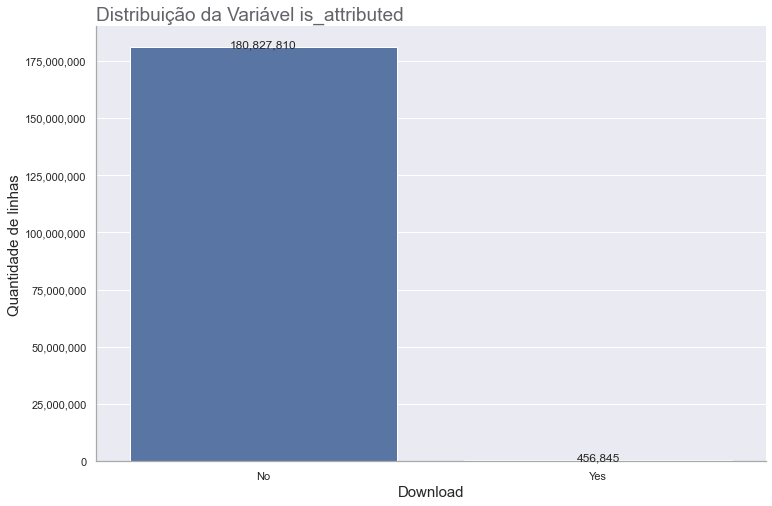

In [5]:
fig, ax = plt.subplots(figsize = (12,8))

sns.barplot(data = count_attributed_total[['No', 'Yes']], ax=ax)

ax.set_title("Distribuição da Variável is_attributed", fontsize = 19, loc = 'left', color = '#646369')
ax.set_xlabel("Download", fontsize = 15)
ax.set_ylabel("Quantidade de linhas", fontsize = 15)
ax.set_xticklabels(['No', 'Yes'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:,.0f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center")

ax.set_ylim(0, 190000000)

plt.show()

#### **Balanceando os Dados**
Acima, conseguimos realizar a verificação de que **180.827.810** (**99.74%** dos dados) registros em nossa tabela (após remoção dos duplicados) possuem valores definidos como **0** (No) e apenas **456.845** (**0.25%** dos dados) valores como **1** (Yes) para a nossa variável ```is_attributed```.

Essa diferença é um grave problema para a construção do nosso modelo preditivo, pois, os fará aprender a identificar mais quando um indivíduo não efetua um download do que quando efetua e precisamos encontrar uma solução para essa situação.

Para isso, iremos realizar a construção de um novo arquivo csv que irá conter a mesma quantidade de linhas para cada resultado (No e Yes) da variável ```is_attributed``` para mantermos uma proporção balanceada.

Para a solução desse problema iremos utilizar todas as linhas de quando a variável is_attributed for 1 e realizar uma amostragem dos valores de is_attributed que sejam 0.

In [28]:
def dataframeBalanc(index) : # Criação de uma função para retornar um DataFrame balanceado
  
  if index == 0 :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=0)
  else :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=None, names=col_name)
  
  file_func.drop_duplicates(inplace=True) # Remoção dos valores duplicados
  
  file_func_0 = file_func.loc[file_func['is_attributed'] == 0]
  file_func_1 = file_func.loc[file_func['is_attributed'] == 1]
  file_func_final = file_func_1.append(file_func_0.sample(n=len(file_func_1))) # Realiza a amostragem

  return file_func_final

train = pd.DataFrame(columns = col_name)

for index in range(len(file_names)) :
  train = train.append(dataframeBalanc(index), ignore_index = True)

train.to_csv('Data/train.csv', index = False) # Salva o arquivo balanceado como train.csv

In [6]:
train = pd.read_csv('Data/train.csv')
train = train.sort_values(by='click_time', ignore_index=True)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1,147948,3,1,19,379,2017-11-06 15:58:41,NaN,0
2,36213,6,1,18,459,2017-11-06 16:00:01,NaN,0
3,145426,2,1,19,452,2017-11-06 16:00:01,NaN,0
4,50915,6,1,18,459,2017-11-06 16:00:02,NaN,0


In [7]:
train['is_attributed'].value_counts()

1    456845
0    456845
Name: is_attributed, dtype: int64

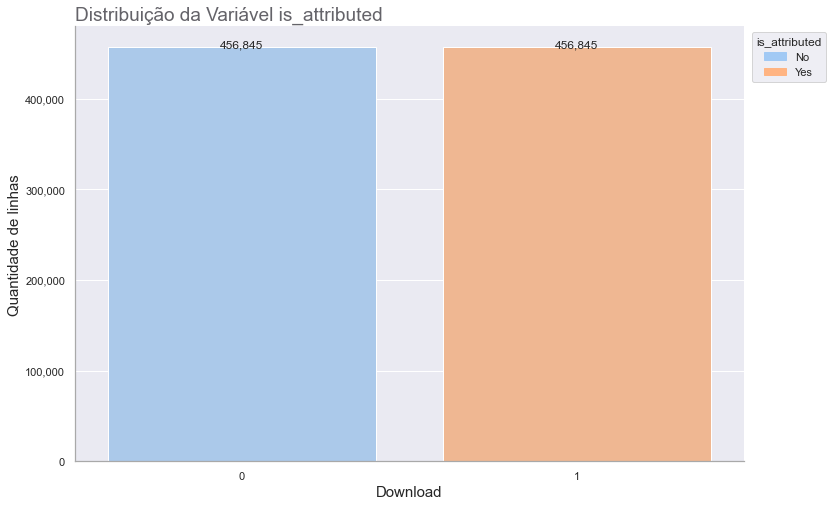

In [8]:
fig, ax = plt.subplots(figsize = (12,8))
palette = list(sns.color_palette('pastel'))[:len(train['is_attributed'].value_counts())]

sns.countplot(data = train, x = 'is_attributed', palette=palette, ax = ax)

ax.set_title("Distribuição da Variável is_attributed", fontsize = 19, loc = 'left', color = '#646369')
ax.set_xlabel("Download", fontsize = 15)
ax.set_ylabel("Quantidade de linhas", fontsize = 15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:,.0f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center")

handles = [plt.Rectangle((0,0),1,1, color=color) for color in palette]
ax.legend(handles, ['No', 'Yes'], title = 'is_attributed', loc='upper right', bbox_to_anchor = (1.13,1))

plt.show()

Conforme podemos verificar acima, realizamos o balanceamento da variável ```is_attributed```, possuindo agora 456.845 linhas para valores 0 (No) e 456.845 linhas valores para 1 (Yes).

### **3.2.2 Importação dos Dados de Teste**

Nessa etapa, iremos realizar a importação dos dados de teste (test.csv). Segundo a documentação oficial do Kaggle, os dados de teste possuem 18.790.470 linhas e 7 colunas.

O test.csv é muito similar ao train.csv, porém, não possuímos as variáveis ```is_attributed``` e ```attributed_time``` (não faz sentido ter valores do que queremos prever não é mesmo?) e foi adicionada a variável ```click_id```  :

| Variável    | Descrição                                                                               |
| ----------- | -----------                                                                             |
| click_id    | Identificador para o clique.                                                            |
| ip          | Define o endereço IP do clique.                                                         |
| app         | Define o ID do aplicativo ao qual o anúncio se refere.                                  |
| device      | Define o ID do dispositivo do usuário.                                                  |
| os          | Define o ID do sistema operacional do dispositivo do usuário.                           |
| channel     | Define o ID do canal de anúncios.                                                       |
| click_time  | Define a data e o horário do clique.                                                    |

Abaixo podemos verificar as 10 primeiras linhas do dataset de teste

In [9]:
pd.read_csv("Data/test1.zip", compression='zip').head(10)

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00
5,5,110769,18,1,13,107,2017-11-10 04:00:00
6,6,12540,3,1,1,137,2017-11-10 04:00:00
7,7,88637,27,1,19,153,2017-11-10 04:00:00
8,9,14932,18,1,10,107,2017-11-10 04:00:00
9,8,123701,12,1,53,424,2017-11-10 04:00:00


# **4. Análise Exploratória dos Dados**

Finalizada a etapa de importação dos dados de treino e teste, podemos partir para o pré-processamento dos dados!

A análise exploratória é uma etapa onde buscamos entender a disposição e as características dos nossos dados, além de extrair insigths que podem auxiliar no processo de criação do modelo preditivo.

In [10]:
train = pd.read_csv("Data/train.csv")
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1
2,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1
3,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1
4,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1


In [11]:
train.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

Conforme podemos analisar acima, possuímos os seguintes tipos de dados para as colunas :

- int64 : Valores inteiros
- object : Valores textos

Para realizar os ajustes no tipo de variáveis, iremos transformar as variáveis click_time e attributed_time no tipo Datetime.

Como as outras variáveis são qualitativas (possuem categorias) podemos deixar as mesmas como int64, representando números.

Para realizar a alteração, utilizaremos a função pd.to_datetime() que irá realizar a conversão das variáveis que possuem "time" no nome (```attributed_time``` e ```click_time```).

Conforme podemos verificar, agora as variáveis estão sendo apresentadas como ```datetime64```.

In [12]:
train.loc[:,train.columns[train.columns.str.contains("time")]] = train.loc[:, train.columns[train.columns.str.contains("time")]].apply(pd.to_datetime)
train.dtypes

ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed               int64
dtype: object

Também é muito importante realizar a identificação de quantidade de valores nulos para cada variável.

Conforme podemos verificar no gráfico abaixo, a variável ```attributed_time``` possui 456.845 valores nulos.

Isso é explicado porque essa variável corresponde à data e horário em que o usuário fez o Download (quando ```is_attributed``` for igual à 1).

Caso não tenha ocorrido o Download (```is_attributed``` igual à 0), não é colocado nenhum horário para essa variável, ficando assim nulo.

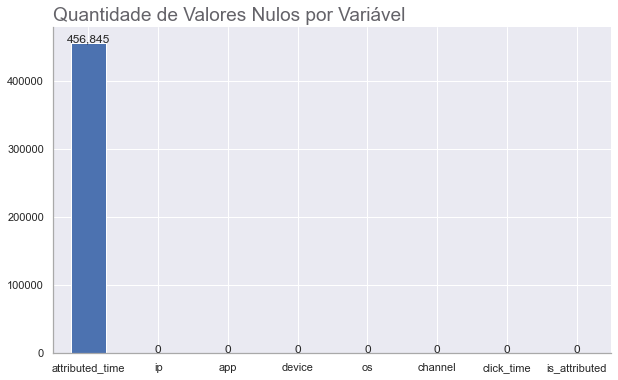

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
train.isnull().sum().sort_values(ascending=False).plot(kind = 'bar')

ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='x', labelrotation= 0)

for p in ax.patches:
  x = p.get_x() + p.get_width() / 2
  y = p.get_y() + p.get_height()
  value = '{:,.0f}'.format(p.get_height())
  ax.text(x, y, value, ha="center")

ax.set_title("Quantidade de Valores Nulos por Variável", fontsize = 19, loc = 'left', color = '#646369')

plt.show()

Outra validação importante é verificar se a nossa variável target **```is_attributed```** possui apenas 2 valores (0 e 1).

E conforme podemos verificar abaixo, conseguimos identificar que os 2 valores (0 e 1) são os únicos da variável e cada um possui 456.845 registros.

In [14]:
train['is_attributed'].value_counts()

1    456845
0    456845
Name: is_attributed, dtype: int64

## **4.1 Análise Exploratória Variáveis Datas**

Primeiro, iremos realizar algumas análises em cima de nossas variáveis do tipo ```datetime``` (valores que contém data / hora).

Conforme podemos verificar abaixo, os nossos dados foram registrados entre o dia 06/11/2017 até 09/11/2017, tendo uma diferença de 3 dias e 18 minutos.

In [15]:
print(f'Primeira data registrada : {min(train["click_time"])} \n Última data registrada : {max(train["click_time"])} \n Diferença : {max(train["click_time"]) - min(train["click_time"])}')

Primeira data registrada : 2017-11-06 15:41:07 
 Última data registrada : 2017-11-09 15:59:59 
 Diferença : 3 days 00:18:52


Também podemos realizar a verificação no gráfico abaixo que o horário dos cliques, separados por ter sido realizado o Download ou não, seguem um padrão, com alta quantidade de cliques perto das 22:00 - 02:00.

Para a geração do gráfico foi realizado o agrupamento por horário.

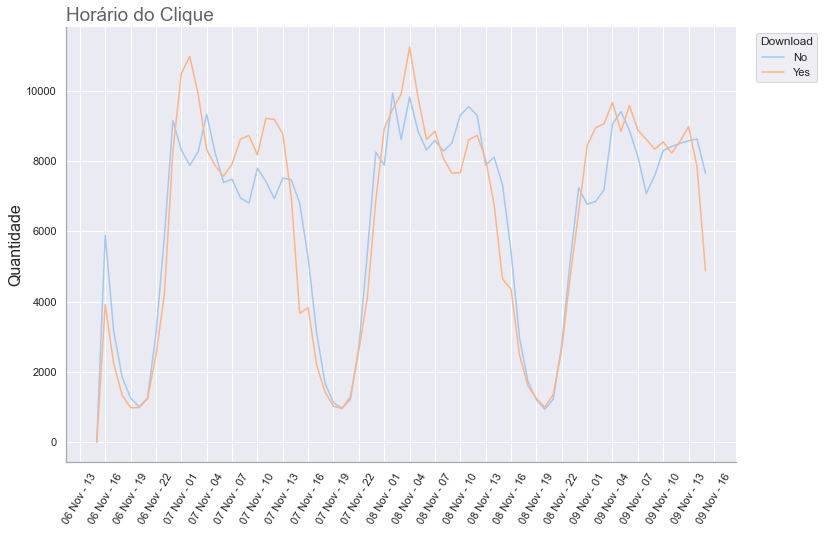

In [16]:
attributed_0 = train.query('is_attributed == 0').resample('1H', on = 'click_time').size()
attributed_1 = train.query('is_attributed == 1').resample('1H', on = 'click_time').size()
palette_0 = list(sns.color_palette('pastel'))[0]
palette_1 = list(sns.color_palette('pastel'))[1]

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = attributed_0.index, y = attributed_0.values, ax = ax, color=palette_0, label = 'No')
sns.lineplot(x = attributed_1.index, y = attributed_1.values, ax = ax, color=palette_1, label = 'Yes')

ax.xaxis.set_major_locator(mdates.HourLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b - %H'))
ax.tick_params(axis='x', labelrotation= 60)

ax.legend(title = 'Download', loc='upper right', bbox_to_anchor = (1.13,1))
ax.set_ylabel('Quantidade', fontsize = 16)
ax.set_xlabel('')

ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("Horário do Clique", fontsize = 19, loc = 'left', color = '#646369')

plt.show()

## **4.2 Análise Exploratória Variáveis Categóricas**

Nessa etapa vamos realizar uma análise nas variáveis definidas como categóricas, que são ```ip```, ```device```, ```app```, ```os```, ```channel``` e ```is_attributed```

Primeiro, iremos realizar a verificação na quantidade de valores únicos de cada variável, onde podemos perceber uma grande quantidade da variável IP (252.928 IPs diferentes foram registrados).

In [17]:
cat_features = [column for column in train.columns[train.columns != 'is_attributed'] if train.dtypes[column] == 'int64']
pd.DataFrame(train[cat_features].nunique().sort_values(ascending=False), columns=['Quantidade de Valores Unicos'])

,Quantidade de Valores Unicos
ip,252928
device,1882
app,330
os,189
channel,179


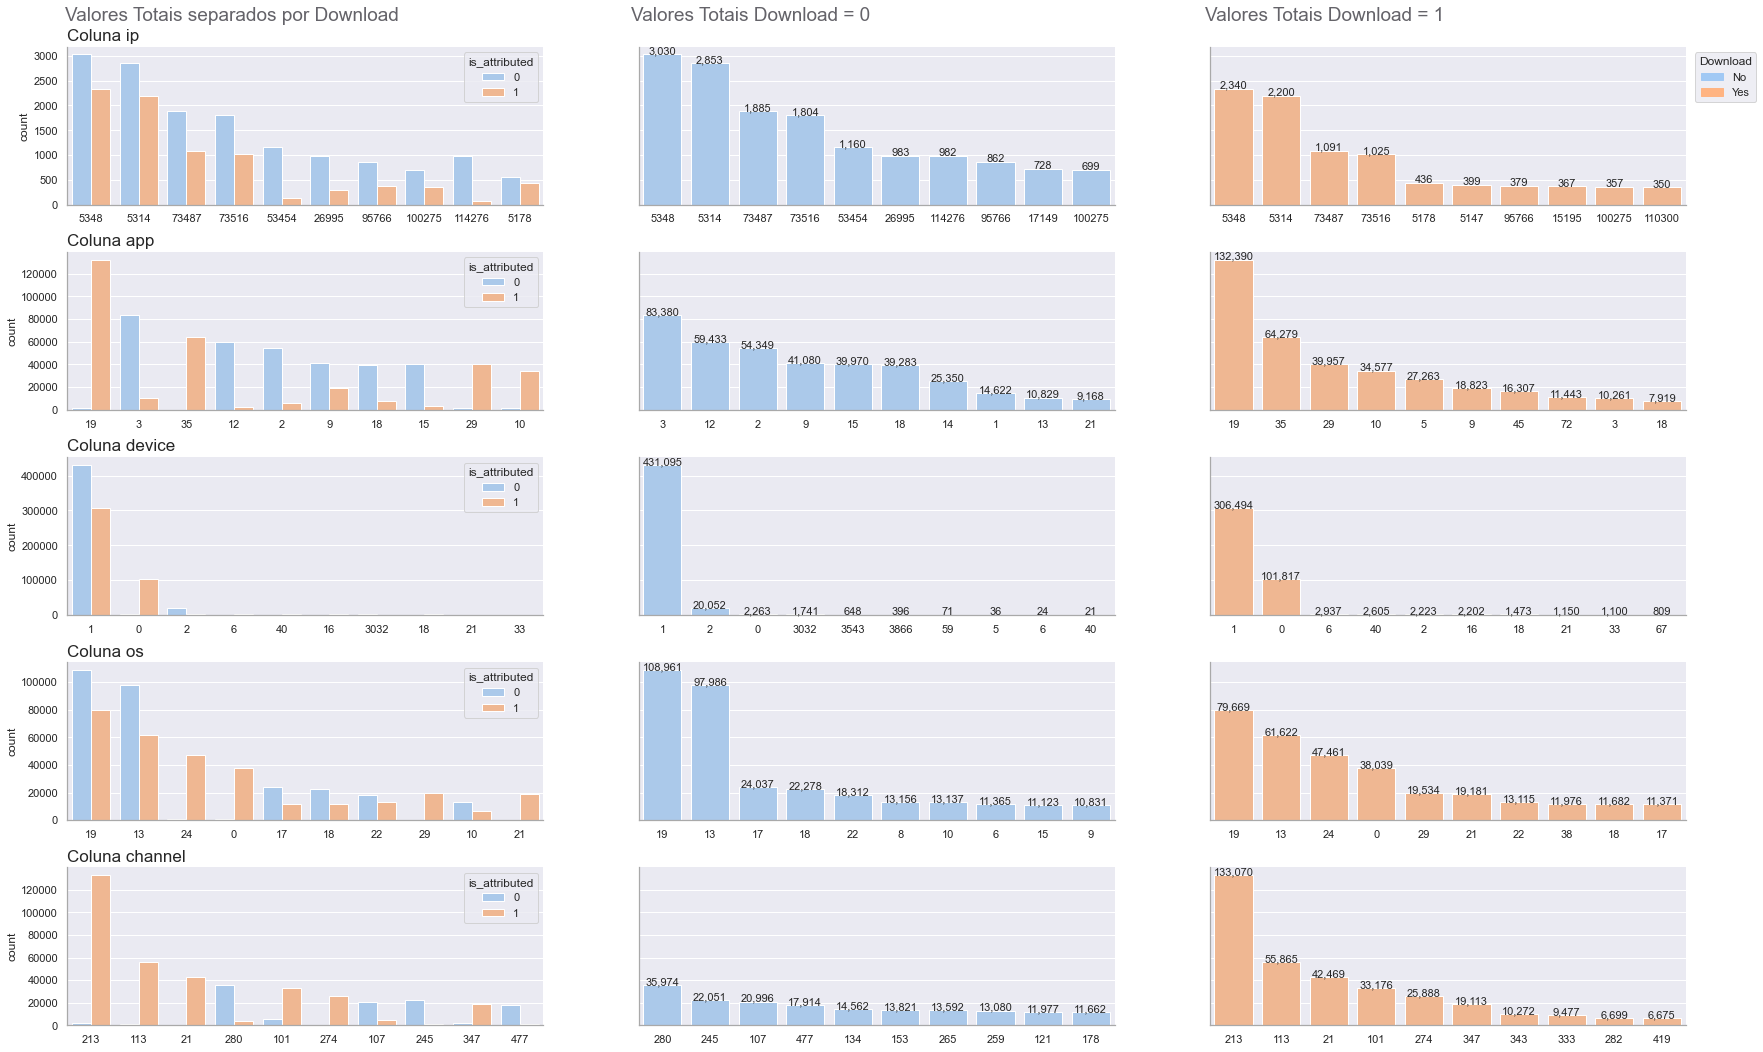

In [18]:
# Adicionar valores nas barras verticais
def ajusta_graf(ax) :
  for p in ax.patches :
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:,.0f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize = 11)

# Criação do Gráfico
def cria_grafico(coluna, ax_row, ax_col) :
  coluna_ord_10 = train[coluna].value_counts()[:10].index
  coluna_ord_10_0 = train.query('is_attributed == 0')[coluna].value_counts()[:10]
  coluna_ord_10_1 = train.query('is_attributed == 1')[coluna].value_counts()[:10]

  if ax_col == 0 :
    sns.countplot(data = train.query(f"{coluna} in @coluna_ord_10"), x = coluna, hue = 'is_attributed', order = coluna_ord_10, ax = axes[ax_row, ax_col], palette=palette)
    axes[ax_row, ax_col].set_title(f'Coluna {coluna}', loc = 'left', fontsize = 17)
    axes[ax_row, ax_col].set_xlabel("")

  if ax_col == 1 :
    sns.barplot(x = coluna_ord_10_0.index, y = coluna_ord_10_0.values, order = coluna_ord_10_0.index, ax = axes[ax_row, ax_col], color = palette[0])
    ajusta_graf(axes[ax_row, ax_col])
    
  if ax_col == 2 :
    sns.barplot(x = coluna_ord_10_1.index, y = coluna_ord_10_1.values, order = coluna_ord_10_1.index, ax = axes[ax_row, ax_col], color = palette[1])
    ajusta_graf(axes[ax_row, ax_col])

  axes[ax_row, ax_col].spines['bottom'].set_color('darkgrey')
  axes[ax_row, ax_col].spines['left'].set_color('darkgrey')
  axes[ax_row, ax_col].spines['right'].set_visible(False)
  axes[ax_row, ax_col].spines['top'].set_visible(False)
  
fig, axes = plt.subplots(len(cat_features), 3, figsize = (29,18), sharey='row')
plt.subplots_adjust(hspace=0.3)
palette = list(sns.color_palette('pastel'))
handles = [plt.Rectangle((0,0),1,1, color=color) for color in palette]

axes[0,2].legend(handles, ['No', 'Yes'], loc='upper right', bbox_to_anchor = (1.16,1), title = 'Download')

fig.text(s = 'Valores Totais separados por Download', x = 0.124, y = 0.90, fontsize = 19, color = '#646369')
fig.text(s = 'Valores Totais Download = 0', x = 0.395, y = 0.90, fontsize = 19, color = '#646369')
fig.text(s = 'Valores Totais Download = 1', x = 0.67, y = 0.90, fontsize = 19, color = '#646369')

row = 0
for column in cat_features :
  cria_grafico(column, row, 0)
  cria_grafico(column, row, 1)
  cria_grafico(column, row, 2)
  row += 1

plt.show()

Ao realizar a criação do gráfico, podemos realizar algumas verificações interessantes, como por exemplo quais IPs estão mais presentes em nossa tabela separados em quais fizeram o Download ou não.

Também podemos notar na coluna ```app``` que os valores **19, 35, 29, 10** possuem uma diferença muito grande registros que fizeram o Download para os que não fizeram. Essa diferença também é valida para os app **3, 12, 2, 15** que possuem mais registros de não realização do Download.

Já em ```device```, podemos notar que três se destacam mais (**1, 0 e 2**), sendo 1 com a maior quantidade de valores.

Para a coluna ```os```, notamos que os valores **24, 0, 29 e 21** possuem uma alta quantidade de realização de Download.

Em ```channel``` também podemos notar que uma alta quantidade de valores de realização de Download está presente nos 3 primeiros valores com maior ocorrência (**213, 113 e 21**)

In [19]:
train.pivot_table(index = ['ip', 'device', 'channel', 'app', 'os', 'is_attributed'], aggfunc = 'size').sort_values(ascending=False)[:20]

ip     device  channel  app  os  is_attributed
5314   0       347      19   24  1                160
                             0   1                156
5348   0       347      19   24  1                150
                             0   1                143
               213      19   24  1                 75
5314   0       213      19   24  1                 73
       1       343      29   19  1                 65
5348   1       343      29   19  1                 63
5314   0       213      19   0   1                 62
5348   1       343      29   13  1                 60
       0       213      19   0   1                 58
95766  0       347      19   24  1                 56
5178   0       347      19   0   1                 55
5348   0       347      19   38  1                 54
5314   0       347      19   38  1                 53
73516  1       326      12   19  0                 50
5147   0       347      19   24  1                 49
5314   1       343      29   13  1 

Acima, podemos realizar um agrupamento para identificar quais valores se repetem mais vezes.

Um destaque para a combinação ```ip``` 5314, ```device``` 0, ```channel``` 347, ```app``` 19 possuem **316 registros** (160 para ```os``` 24 e 156 para ```os``` 0), onde todos foram realizados o Download (```is_attributed == 1```)

# **5. Pré-Processamento de Dados**

Finalizada a exploração de nossas variáveis, iremos partir para a etapa de Pré-Processamento de Dados.

Essa etapa consiste em preparar o nosso dataset para a fase da modelagrem preditiva, realizando a remoção / adição de novas colunas, remoção / alteração de valores NA (nulos) e muitas outras operações.

Para essa etapa, iremos realizar a remoção da coluna ```attributed_time```, pois ela registra o instante de tempo em que o ```is_attributed``` igual à 1 ocorre.

Também iremos realizar a extração do dia e horário da variável ```click_time```(será removida) e criaremos as colunas ```click_day``` e ```click_hour```.

Também realiaremos a criação de uma coluna ```click_period``` que representa o período do dia, sendo :
- Madrugada (00:00 - 06:00) = 0
- Manhã (06:00 - 12:00) = 1
- Tarde (12:00 - 18:00) = 2
- Noite (18:00 - 24:00) = 3 

In [20]:
train['click_day'] = train['click_time'].dt.day
train['click_hour'] = train['click_time'].dt.hour
train['click_period'] = pd.cut(x = train['click_time'].dt.hour, bins = [0, 6, 12, 18, 23], labels = [0, 1, 2, 3], include_lowest=True).astype('int64')
train = train.drop(['click_time','attributed_time'], axis = 1)
train.head()

,ip,app,device,os,channel,is_attributed,click_day,click_hour,click_period
0,204158,35,1,13,21,1,6,15,2
1,29692,9,1,22,215,1,6,16,2
2,64516,35,1,13,21,1,6,16,2
3,172429,35,1,46,274,1,6,16,2
4,199085,35,1,13,274,1,6,16,2


# **6. Criação do Modelo de Machine Learning**

Finalizada a etapa do pré-processamento, podemos partir para a criação do nosso Modelo de Machine Learning que irá realizar a previsão da classificação da variável ```ìs_attributed```.

Para essa etapa, iremos trabalhar apenas com o ```train.csv```, pois o arquivo ```test.csv``` não possui resultados da variável ```is_attributed``` para utilizarmos as métricas e validarmos se o nosso modelo está conseguindo bons resultados.

## **6.1 Importação dos Pacotes Utilizados**

In [21]:
# Algoritmos de Machine Learning que serão utilizados
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Métricas que serão utilizadas (AUC - Area Under the Roc Curve e Confusion Matrix)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

# Validação Cruzada
from sklearn.model_selection import train_test_split

## **6.2 Criação e Treinamento dos Modelos**

In [22]:
# Separação da variável target das preditoras
y = train.loc[:,'is_attributed'] # Variável Target y / Dependente
X = train.drop('is_attributed', axis = 1) # Variáveis Preditoras X / Independentes

# Separação em dados de treino e dados de teste (necessário para sabermos como o nosso modelo está se saindo)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 4561)

[14:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Modelo,AUC
0,LR,0.826109
1,NB,0.813138
2,CART,0.883327
3,AdaBoost,0.951537
4,XGBoost,0.971424


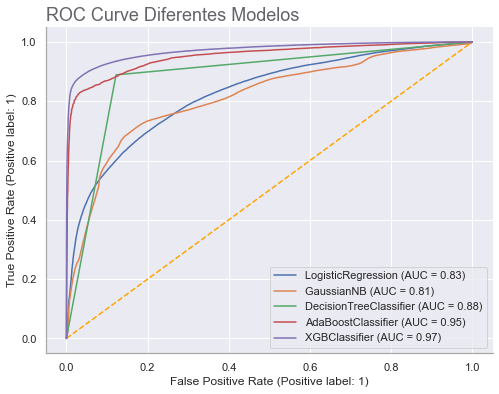

In [23]:
# Função para retornar o modelo e plotar ROC Curve
def roda_modelo(classifiers) :
  resultados_dataframe = pd.DataFrame(columns = ['Modelo', 'AUC'])
  fig, ax = plt.subplots(figsize = (8,6))
  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  for name, cls in classifiers :
    modelo = cls.fit(X_train, y_train)
    
    # Preenche o resultados_dataframe com 
    prob_modelo = modelo.predict_proba(X_test)
    resultados_dataframe = resultados_dataframe.append({'Modelo' : name, 'AUC' : roc_auc_score(y_test, prob_modelo[:,1])}, ignore_index = True)
    
    # Plota ROC Curve
    plot_roc_curve(modelo, X_test, y_test, ax=ax)
  
  ax.set_title('ROC Curve Diferentes Modelos', fontsize = 18, loc = 'left', color = '#646369')
  ax.spines['bottom'].set_color('darkgrey')
  ax.spines['left'].set_color('darkgrey')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  
  return resultados_dataframe

modelos = [('LR', LogisticRegression()), 
           ('NB', GaussianNB()), 
           ('CART', DecisionTreeClassifier()), 
           ('AdaBoost', AdaBoostClassifier()),
           ('XGBoost', XGBClassifier())]

resultado = roda_modelo(modelos)
resultado

Conforme podemos verificar acima, o modelo XGBClassifier (XGBoost) teve o melhor valor para a Area Under the Curve (AUC) com 0.971424.

Abaixo, podemos verificar com uma Matriz de Confusão (Confusion Matrix) que o modelo teve os seguintes resultados :
- TP (True Positive) = 88082 ---> Valores que eram 0 e foram previstos como 0
- FP (False Positive) = 3237 ---> Valores que eram 1 e foram previstos como 0
- FN (False Negative) = 10605 --> Valores que eram 0 e foram previstos como 1
- TN (True Negative) = 80764 ---> Valores que eram 1 e foram previstos como 1

Também podemos identificar que a nossa acurácia (total de acertos) com o modelo XGBoost foi de 92.39%.

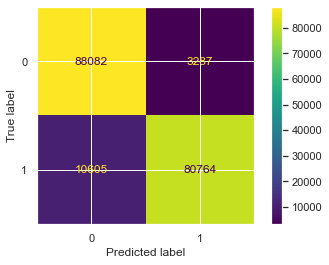

In [24]:
xgboost_model = XGBClassifier(verbosity = 0)
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
plot_confusion_matrix(xgboost_model, X_test, y_test)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
print(f' A acurácia do modelo foi de, aproximadamente, {round(accuracy_score(y_test, y_pred), 5) * 100}%.')

 A acurácia do modelo foi de, aproximadamente, 92.398%.


## **6.3 Previsão test.csv e submissão no Kaggle**

Para finalizar o projeto, iremos realizar a previsão dos dados de teste e submeter no [Kaggle](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/submissions).

In [26]:
files = ['test1.zip', 'test2.zip', 'test3.zip', 'test4.zip', 'test5.zip']
test_cols = pd.read_csv(f"Data/{files[0]}", compression='zip').columns

Para realizar a previsão com o modelo preditivo que utilizamos nos dados train.csv, devemos realizar as mesmas transformações que fizemos anteriormente.

Iremos repassar a coluna ```click_time``` para datetime e iremos criar as colunas ```click_day```, ```click_hour``` e ```click_period```.

In [27]:
def ajusta_test(files, columns) :
  test_df = pd.DataFrame(columns = columns)

  for index in range(len(files)) :
    
    if index == 0 :
      file_func = pd.read_csv(f"Data/{files[index]}", compression = 'zip', header=0)
    
    else :
      file_func = pd.read_csv(f"Data/{files[index]}", compression = 'zip', header=None, names=columns)

    test_df = test_df.append(file_func)
    
  test_df.reset_index(drop = True, inplace = True)  
  test_df['click_time'] = pd.to_datetime(test_df['click_time'])

  test_df['click_day'] = test_df['click_time'].dt.day
  test_df['click_hour'] = test_df['click_time'].dt.hour
  test_df['click_period'] = pd.cut(x = test_df['click_time'].dt.hour, bins = [0, 6, 12, 18, 23], labels = [0, 1, 2, 3], include_lowest=True).astype('int64')
  test_df = test_df.drop('click_time', axis = 1)
  
  return test_df

In [28]:
test = ajusta_test(files, test_cols)
test

,click_id,ip,app,device,os,channel,click_day,click_hour,click_period
0,0,5744,9,1,3,107,10,4,0
1,1,119901,9,1,3,466,10,4,0
2,2,72287,21,1,19,128,10,4,0
3,3,78477,15,1,13,111,10,4,0
4,4,123080,12,1,13,328,10,4,0
...,...,...,...,...,...,...,...,...,...
18790464,18790464,99442,9,1,13,127,10,15,2
18790465,18790465,88046,23,1,37,153,10,15,2
18790466,18790467,81398,18,1,17,265,10,15,2
18790467,18790466,123236,27,1,13,122,10,15,2


Após isso, iremos realizar o treinamento e a previsão do nosso modelo XGBoost e transformar em um arquivo .csv para submetermos no Kaggle.

In [29]:
X_test = test.iloc[:,1:]
click_id = test.iloc[:,0]

xgboost_model = XGBClassifier(verbosity = 0)
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)

submission_df = pd.DataFrame({'click_id' : click_id, 'is_attributed' : y_pred})

In [214]:
 submission_df.to_csv('Data/submission.csv', index=False)

Por fim, obtivemos as seguintes pontuações com a métrica AUC no Kaggle ao submeter as previsões geradas pelo nosso modelo para os dados de teste:
- **Private Score : 0.90632**
- **Public Score : 0.90210**

# **7. Conclusão**
Finalizado o projeto de previsão de fraude de cliques, acredito que tenha sido um projeto muito satisfatório para fins de estudo, onde conseguimos um resultado de **0.90632** para a métrica AUC no Kaggle e também separar e trabalhar bem nas etapas de um projeto de Data Science.

Como forma de melhorar o projeto, penso que deverá ser realizada uma tratativa melhor em cima da variável ```ip```, pois, a mesma possui muitos valores únicos para uma categoria.

# **8. Entre em Contato Comigo!**

Caso você queira realizar alguma sugestão ou simplesmente entrar em contato comigo, sinta-se à vontade para clicar nos ícones abaixo :)

[<img align="left" alt="Gmail" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Gmail.png?raw=true" />][Gmail] <-- Me envie um E-mail  <br/> <br/>
[<img align="left" alt="LinkedIn" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Linkedin.png?raw=true" />][LinkedIn] <-- Visualize meu LinkedIn<br/> <br/>
[<img align="left" alt="Kaggle" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Kaggle.png?raw=true" />][Kaggle] <-- Visualize meu Kaggle <br/> <br/>
[<img align="left" alt="LinkedIn" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Spotify.png?raw=true" />][Spotify] <-- Ouça uma música comigo

[Gmail]: mailto:gglquadra@gmail.com
[LinkedIn]: https://www.linkedin.com/in/gustavoquadra/
[Spotify]: https://open.spotify.com/user/x3z0vkgow695jglc3rvxpevnk
[Kaggle]: https://www.kaggle.com/gustavoluizquadra